In this notebook try keeping the V columns and see how that effects the results

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import accuracy_score, roc_auc_score 

path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 20
pd.options.display.max_columns = 12

In [3]:
path.ls()

(#13) [Path('test_transaction.csv'),Path('train_s.csv'),Path('train_ss.csv'),Path('train_identity.csv'),Path('test.csv'),Path('xs_final.pkl'),Path('to2.pkl'),Path('valid_xs_final.pkl'),Path('train.csv'),Path('to.pkl')...]

In [4]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [5]:
train_s.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
57195,3044195,0,1316341,418.950,W,4806,...,NaN,NaN,NaN,NaN,NaN,NaN
312877,3299877,0,7780176,59.000,W,12577,...,NaN,NaN,NaN,NaN,NaN,NaN
195195,3182195,1,4394717,29.000,W,4693,...,NaN,NaN,NaN,NaN,NaN,NaN
21600,3008600,0,572518,24.000,W,7919,...,NaN,NaN,NaN,NaN,NaN,NaN
12253,2999253,0,348181,57.950,W,13108,...,NaN,NaN,NaN,NaN,NaN,NaN
377675,3364675,0,9444273,150.000,R,15225,...,T,F,F,F,desktop,Windows
160611,3147611,0,3374431,250.000,R,16174,...,T,F,T,F,desktop,Windows
86738,3073738,0,1822406,24.078,C,4094,...,NaN,NaN,NaN,NaN,NaN,NaN
426550,3413550,0,10784440,280.000,W,1273,...,NaN,NaN,NaN,NaN,NaN,NaN
34293,3021293,0,849508,88.500,W,3681,...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_s["isFraud"].mean()

0.036187218478003186

This indicates that there is class imbalance of about 1 to 30. 

In [7]:
train_s.shape

(59054, 434)

In [8]:
train_s.columns.to_list()

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [9]:
train_s.columns[0]

'TransactionID'

In [12]:
dep_var = 'isFraud'

In [18]:
def nans_by_col(df):
    p_nan = {}
    print('--Lengths--' + '--NaN Counts--' + '--Percent NaN--')
    for col in df.columns:
        nan_count = len(train_s[col]) - train_s[col].count()
        length = len(train_s[col])
        percent_nan = nan_count/length
        p_nan[col] = percent_nan
        print(f'{col}: {length},     {nan_count},     {percent_nan}')
    return p_nan

In [19]:
p_nan = nans_by_col(train_s)

--Lengths----NaN Counts----Percent NaN--
TransactionID: 59054,     0,     0.0
isFraud: 59054,     0,     0.0
TransactionDT: 59054,     0,     0.0
TransactionAmt: 59054,     0,     0.0
ProductCD: 59054,     0,     0.0
card1: 59054,     0,     0.0
card2: 59054,     903,     0.015291089511294747
card3: 59054,     160,     0.0027093846310156807
card4: 59054,     160,     0.0027093846310156807
card5: 59054,     447,     0.0075693433129000575
card6: 59054,     160,     0.0027093846310156807
addr1: 59054,     6450,     0.10922206793781962
addr2: 59054,     6450,     0.10922206793781962
dist1: 59054,     35383,     0.599163477495174
dist2: 59054,     55440,     0.9388017746469333
P_emaildomain: 59054,     9427,     0.15963355572865512
R_emaildomain: 59054,     45425,     0.7692112303992955
C1: 59054,     0,     0.0
C2: 59054,     0,     0.0
C3: 59054,     0,     0.0
C4: 59054,     0,     0.0
C5: 59054,     0,     0.0
C6: 59054,     0,     0.0
C7: 59054,     0,     0.0
C8: 59054,     0,     0.0

We see that there are many columns with a highpercentage of NaNs. This indicates that where a value os missing or not may npt say a whole lot about wether a transaction is fraud.

In [20]:
procs = [Categorify, FillMissing]

In [21]:
train_s['TransactionDT']

57195      1316341
312877     7780176
195195     4394717
21600       572518
12253       348181
            ...   
224165     5277204
322952     8012992
449491    11466467
343893     8470758
125898     2493922
Name: TransactionDT, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greate than a certain value. These rows are transactions that occour later in time. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [22]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12579784

In [23]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [24]:
np.where(cond)[0]

array([    0,     1,     2, ..., 59051, 59052, 59053])

In [45]:
# For mow try using fastai cont_cat_split, in the future I will use the info that the kaggle hosts provide.
#cont,cat = cont_cat_split(train_ss, 1, dep_var=dep_var)
# cat = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
#             'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
#             'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
#             'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']

cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
#cont = list(set(train_ss.columns) - set(cat) - set(['isFraud'])) 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2','V3','V4','V5','V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V129',
 'V130',
 'V131',
 'V132',
 'V133',
 'V134',
 'V135',
 'V136',
 'V137',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V240',
 'V241',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V250',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V269',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337','V338','V339']


In [46]:
len(cont),len(cat)

(384, 49)

In [47]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [49]:
to = TabularPandas(train_s, procs, cat, cont, y_names=dep_var, splits=splits)

In [50]:
to.show()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na,V1_na,V2_na,V3_na,V4_na,V5_na,V6_na,V7_na,V8_na,V9_na,V10_na,V11_na,V12_na,V13_na,V14_na,V15_na,V16_na,V17_na,V18_na,V19_na,V20_na,V21_na,V22_na,V23_na,V24_na,V25_na,V26_na,V27_na,V28_na,V29_na,V30_na,V31_na,V32_na,V33_na,V34_na,V35_na,V36_na,V37_na,V38_na,V39_na,V40_na,V41_na,V42_na,V43_na,V44_na,V45_na,V46_na,V47_na,V48_na,V49_na,V50_na,V51_na,V52_na,V53_na,V54_na,V55_na,V56_na,V57_na,V58_na,V59_na,V60_na,V61_na,V62_na,V63_na,V64_na,V65_na,V66_na,V67_na,V68_na,V69_na,V70_na,V71_na,V72_na,V73_na,V74_na,V75_na,V76_na,V77_na,V78_na,V79_na,V80_na,V81_na,V82_na,V83_na,V84_na,V85_na,V86_na,V87_na,V88_na,V89_na,V90_na,V91_na,V92_na,V93_na,V94_na,V95_na,V96_na,V97_na,V98_na,V99_na,V100_na,V101_na,V102_na,V103_na,V104_na,V105_na,V106_na,V107_na,V108_na,V109_na,V110_na,V111_na,V112_na,V113_na,V114_na,V115_na,V116_na,V117_na,V118_na,V119_na,V120_na,V121_na,V122_na,V123_na,V124_na,V125_na,V126_na,V127_na,V128_na,V129_na,V130_na,V131_na,V132_na,V133_na,V134_na,V135_na,V136_na,V137_na,V138_na,V139_na,V140_na,V141_na,V142_na,V143_na,V144_na,V145_na,V146_na,V147_na,V148_na,V149_na,V150_na,V151_na,V152_na,V153_na,V154_na,V155_na,V156_na,V157_na,V158_na,V159_na,V160_na,V161_na,V162_na,V163_na,V164_na,V165_na,V166_na,V167_na,V168_na,V169_na,V170_na,V171_na,V172_na,V173_na,V174_na,V175_na,V176_na,V177_na,V178_na,V179_na,V180_na,V181_na,V182_na,V183_na,V184_na,V185_na,V186_na,V187_na,V188_na,V189_na,V190_na,V191_na,V192_na,V193_na,V194_na,V195_na,V196_na,V197_na,V198_na,V199_na,V200_na,V201_na,V202_na,V203_na,V204_na,V205_na,V206_na,V207_na,V208_na,V209_na,V210_na,V211_na,V212_na,V213_na,V214_na,V215_na,V216_na,V217_na,V218_na,V219_na,V220_na,V221_na,V222_na,V223_na,V224_na,V225_na,V226_na,V227_na,V228_na,V229_na,V230_na,V231_na,V232_na,V233_na,V234_na,V235_na,V236_na,V237_na,V238_na,V239_na,V240_na,V241_na,V242_na,V243_na,V244_na,V245_na,V246_na,V247_na,V248_na,V249_na,V250_na,V251_na,V252_na,V253_na,V254_na,V255_na,V256_na,V257_na,V258_na,V259_na,V260_na,V261_na,V262_na,V263_na,V264_na,V265_na,V266_na,V267_na,V268_na,V269_na,V270_na,V271_na,V272_na,V273_na,V274_na,V275_na,V276_na,V277_na,V278_na,V279_na,V280_na,V281_na,V282_na,V283_na,V284_na,V285_na,V286_na,V287_na,V288_na,V289_na,V290_na,V291_na,V292_na,V293_na,V294_na,V295_na,V296_na,V297_na,V298_na,V299_na,V300_na,V301_na,V302_na,V303_na,V304_na,V305_na,V306_na,V307_na,V308_na,V309_na,V310_na,V311_na,V312_na,V313_na,V314_na,V315_na,V316_na,V317_na,V318_na,V319_na,V320_na,V321_na,V322_na,V323_na,V324_na,V325_na,V326_na,V327_na,V328_na,V329_na,V330_na,V331_na,V332_na,V333_na,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155

In [51]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,...,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na
57195,3044195,0,1316341,418.950012,5,1233,...,2,2,2,2,2,2
312877,3299877,0,7780176,59.000000,5,3740,...,2,2,2,2,2,2
195195,3182195,1,4394717,29.000000,5,1196,...,2,2,2,2,2,2
21600,3008600,0,572518,24.000000,5,2236,...,2,2,2,2,2,2
12253,2999253,0,348181,57.950001,5,3916,...,2,2,2,2,2,2


In [52]:
to.classes['ProductCD']

(#6) ['#na#','C','H','R','S','W']

In [53]:
(path/'to2.pkl').save(to)

In [54]:
to = (path/'to2.pkl').load()

In [55]:
to

        TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  \
57195         3044195        0        1316341      418.950012          5   
312877        3299877        0        7780176       59.000000          5   
195195        3182195        1        4394717       29.000000          5   
21600         3008600        0         572518       24.000000          5   
12253         2999253        0         348181       57.950001          5   
...               ...      ...            ...             ...        ...   
585191        3572191        0       15640873       77.000000          5   
582517        3569517        0       15554442      524.950012          5   
493713        3480713        0       12875913       85.000000          5   
526363        3513363        0       13829953      100.000000          2   
500247        3487247        0       13115806       92.000000          5   

        card1  ...  V334_na  V335_na  V336_na  V337_na  V338_na  V339_na  
57195    123

In [56]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [57]:
xs.shape, valid_xs.shape

((48378, 800), (10676, 800))

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

In [58]:
np.array(xs.columns.to_list())

array(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType',
       'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'dist1_na', 'dist2_na', 'D1_na', 'D2_na', 'D3_na', 'D4_na', 'D5_na', 'D6_na', 'D7_na', 'D8_na', 'D9_na', 'D10_na',
       'D11_na', 'D12_na', 'D13_na', 'D14_na', 'D15_na', 'id_01_na', 'id_02_na', 'id_03_na', 'id_04_na', 'id_05_na', 'id_06_na', 'id_07_na', 'id_08_na', 'id_09_na', 'id_10_na', 'id_11_na', 'V1_na',
       'V2_na', 'V3_na', 'V4_na', 'V5_na', 'V6_na', 'V7_na', 'V8_na', 'V9_na', 'V10_na', 'V11_na', 'V12_na', 'V13_na', 'V14_na', 'V15_na', 'V16_na', 'V17_na', 'V18_na', 'V19_na', 'V20_na', 'V21_na',
       'V22_na', 'V23_n

In [59]:
to.train.y

57195     0
312877    0
195195    1
21600     0
12253     0
         ..
224165    0
322952    1
449491    0
343893    0
125898    0
Name: isFraud, Length: 48378, dtype: int8

In [60]:
m = DecisionTreeClassifier(max_leaf_nodes=4)

In [61]:
m.fit(xs, y)

DecisionTreeClassifier(max_leaf_nodes=4)

In [125]:
#draw_tree()

In [62]:
preds = m.predict(valid_xs)

In [63]:
accuracy_score(valid_y, preds)

0.967965530161109

That is expected, accuracy cant be trusted because of the major imbalance of labels. 

The competition ask for a prediction of the probabily of 'isFraud' = 1.

In [64]:
def m_roc(y, xs):
    preds = m.predict_proba(xs)
    preds_isFraud = preds[:,1]
    return roc_auc_score(y, preds_isFraud)

In [65]:
m_roc(y, xs)

0.6355335019701606

In [66]:
m = DecisionTreeClassifier()

In [67]:
%%time
m.fit(xs, y)

CPU times: user 29.6 s, sys: 564 ms, total: 30.2 s
Wall time: 30.3 s


DecisionTreeClassifier()

In [68]:
m_roc(y, xs)

1.0

In [69]:
m_roc(valid_y, valid_xs)

0.659501407595164

In [70]:
m.get_n_leaves(), len(xs)

(1587, 48378)

Q: How to find the best value for max leaf nodes?

# play with max_leaf_nodes

In [71]:
m = DecisionTreeClassifier(max_leaf_nodes=50)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8108695713177215, 0.7799531683111983)

# play with min_samples_leaf

In [72]:
m = DecisionTreeClassifier(min_samples_leaf=80)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.934658982874442, 0.792367225404081)

# Random forests

In [73]:
max_samples = math.ceil(len(to.train)*0.66)
def rf(xs, y, max_samples=max_samples, 
       max_features='sqrt', max_leaf_nodes=50, **kwargs):
    return RandomForestClassifier(n_jobs=-1, 
        max_samples=max_samples, max_features=max_features, 
        max_leaf_nodes=max_leaf_nodes, oob_score=True, **kwargs).fit(xs, y)

In [75]:
%%time
m = rf(xs, y, n_estimators=1000)

CPU times: user 2min 55s, sys: 8.35 s, total: 3min 3s
Wall time: 1min 18s


In [76]:
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8609792253317717, 0.8284693234006987)

In [77]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

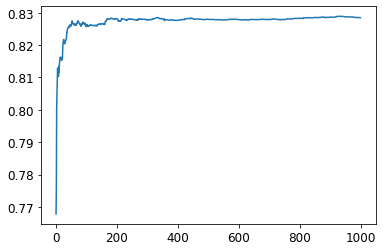

In [78]:
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(1000)])

should be able to get away with using between 50 and 400 estimators

In [79]:
m = rf(xs, y, n_estimators=200)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8603216241968479, 0.826826795141279)

In [80]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

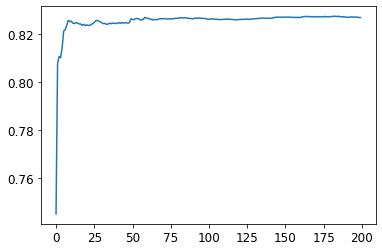

In [81]:
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(200)])

AROC is higher for the training set than for the validation set. This may be the result of overfitting or it may have to do with the fact that the validation set we are predicting on is in the future with relative to the training set. If there is a bit of overfitting, that isn't nessesarily a problem, but nevertheless it would be nice if there were a way to find out. OOB error gives us a way to do that.

# OOB error

In [82]:
  m.oob_decision_function_.shape

(48378, 2)

In [83]:
oob_preds = m.oob_decision_function_[:,1:2]

In [84]:
roc_auc_score(y, oob_preds)

0.8494549340230145

This indicates that there is not much overfitting and that the validation score is lower than the training score because of something that sets the two datasets apart, like for instance the validation set being from the future.

# Class weighting

In [85]:
m = rf(xs, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8872497964814146, 0.8423848687593475)

In [86]:
oob_preds = m.oob_decision_function_[:,1:2]
roc_auc_score(y, oob_preds)

0.8627918119777592

# Model interpretation

Qs:

1. How confident are we in our predictions using a particular row
2. What are the most important factors when predicting a particular row and how did the influence it
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns

## Tree variance for prediction confidence

In [87]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

In [88]:
roc_auc_score(valid_y,preds[:,:,1:2].mean(0))

0.8423848687593475

In [89]:
preds[:,:,1:2].std(0).transpose()

array([[0.1873092 , 0.1235042 , 0.13968344, ..., 0.17209026, 0.1670641 , 0.14588328]])

For items where std is large, trees dont agree, unsure, maybe put these items through a different classifier and try again for more confidant predictions.

## Feature importance

In [90]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [91]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
433,C13,0.020410
424,C4,0.019408
434,C14,0.019155
421,C1,0.017971
425,C5,0.017146
718,V258,0.016853
489,V29,0.016777
529,V69,0.015541
530,V70,0.015297
777,V317,0.014107


<AxesSubplot:ylabel='cols'>

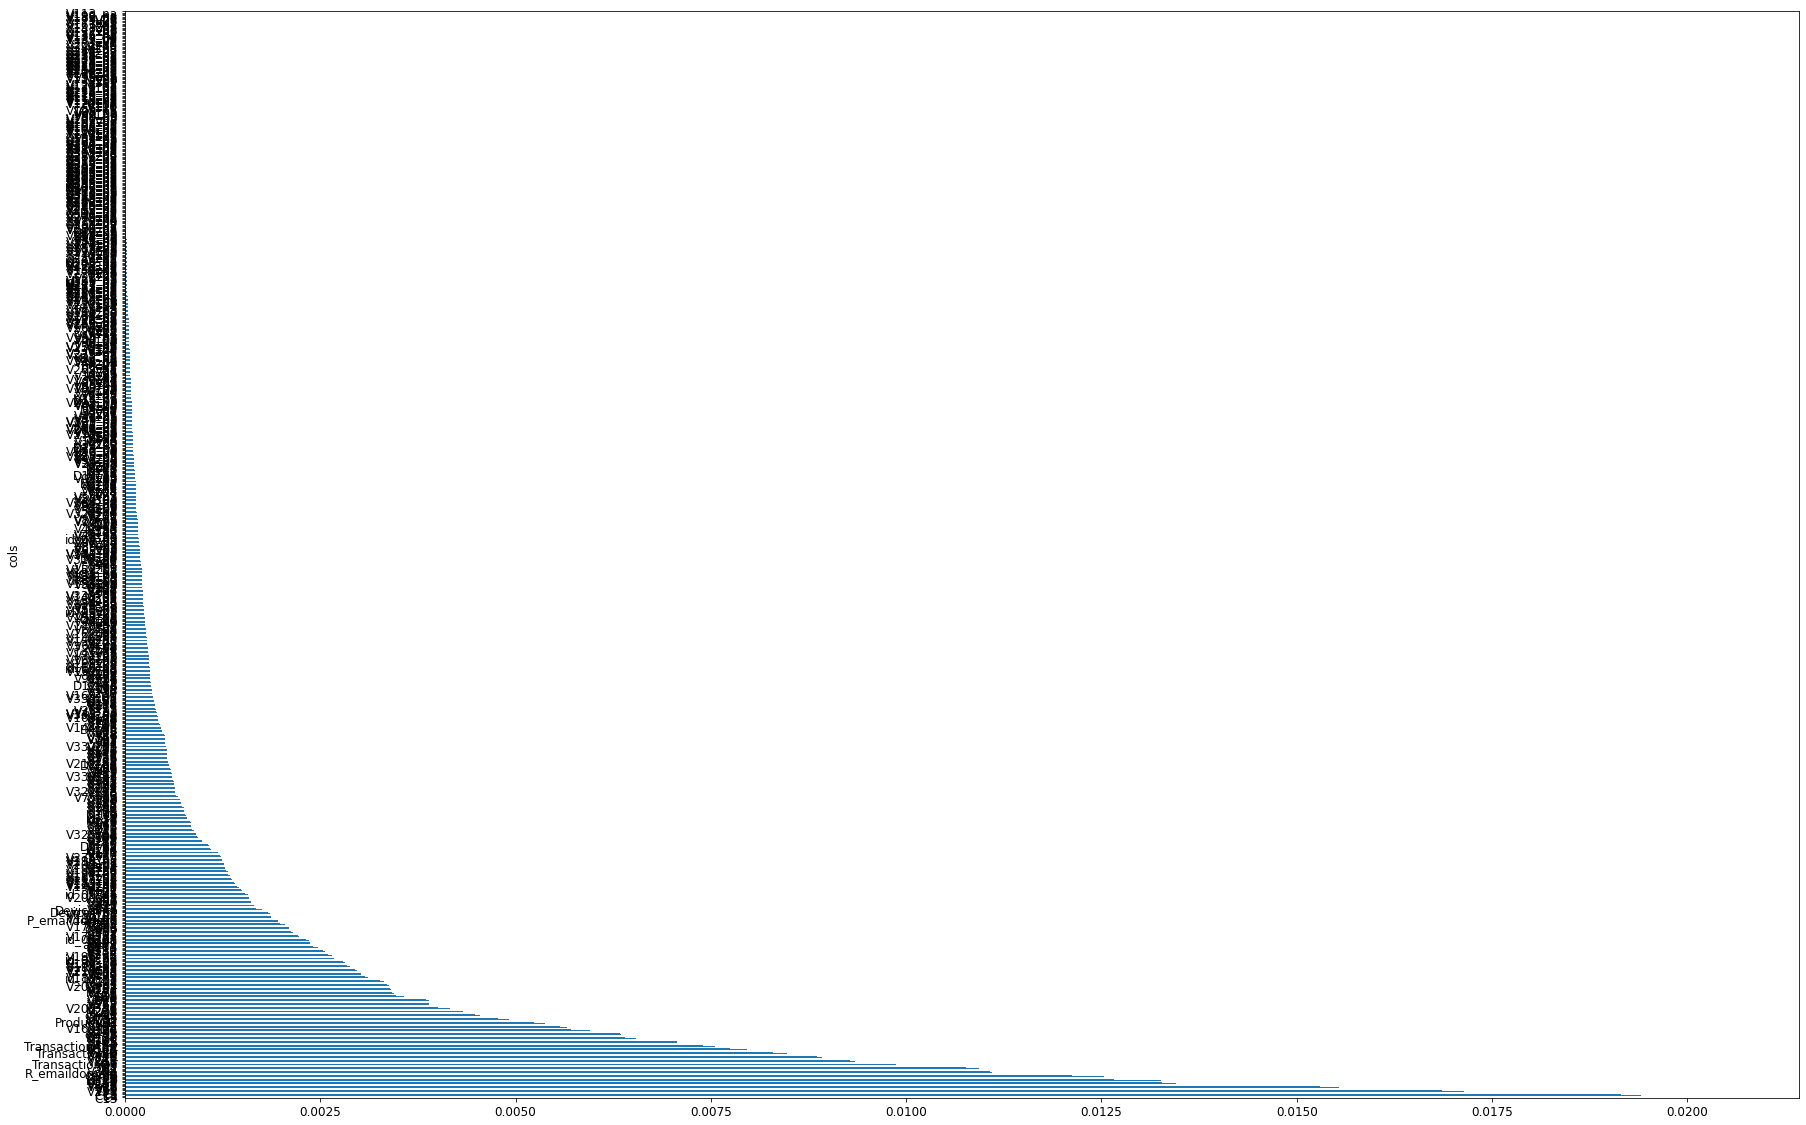

In [92]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,20), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [99]:
to_keep = fi[fi.imp>0.001].cols
len(to_keep)

188

In [100]:
xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [101]:
#slight improvement
m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

(0.8935905869860159, 0.8435055757543702)

In [103]:
#0.003 lower
to_keep = fi[fi.imp>0.0005].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 268


(0.8924743614480402, 0.8418621125707504)

<AxesSubplot:ylabel='cols'>

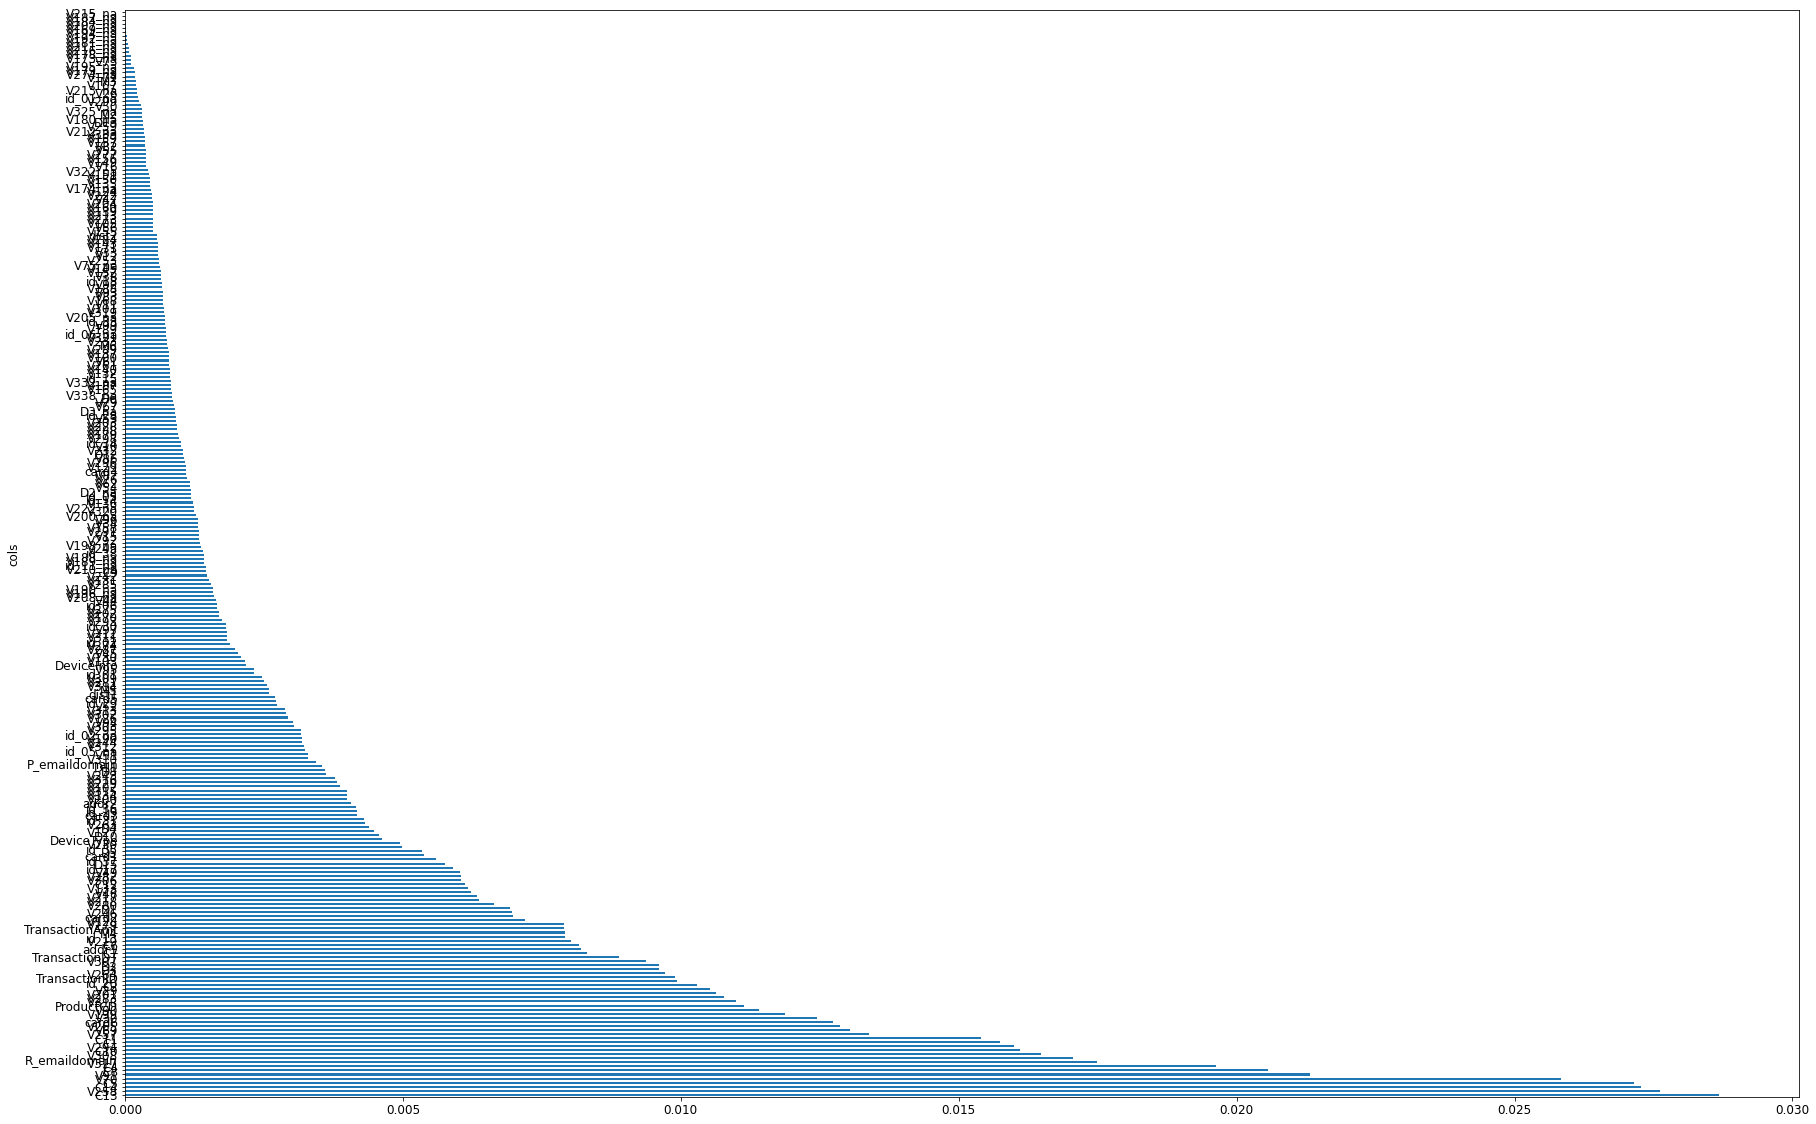

In [104]:
plot_fi(rf_feature_importance(m, xs_imp))

In [109]:
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 128


(0.8929169472415381, 0.842963987521166)

<AxesSubplot:ylabel='cols'>

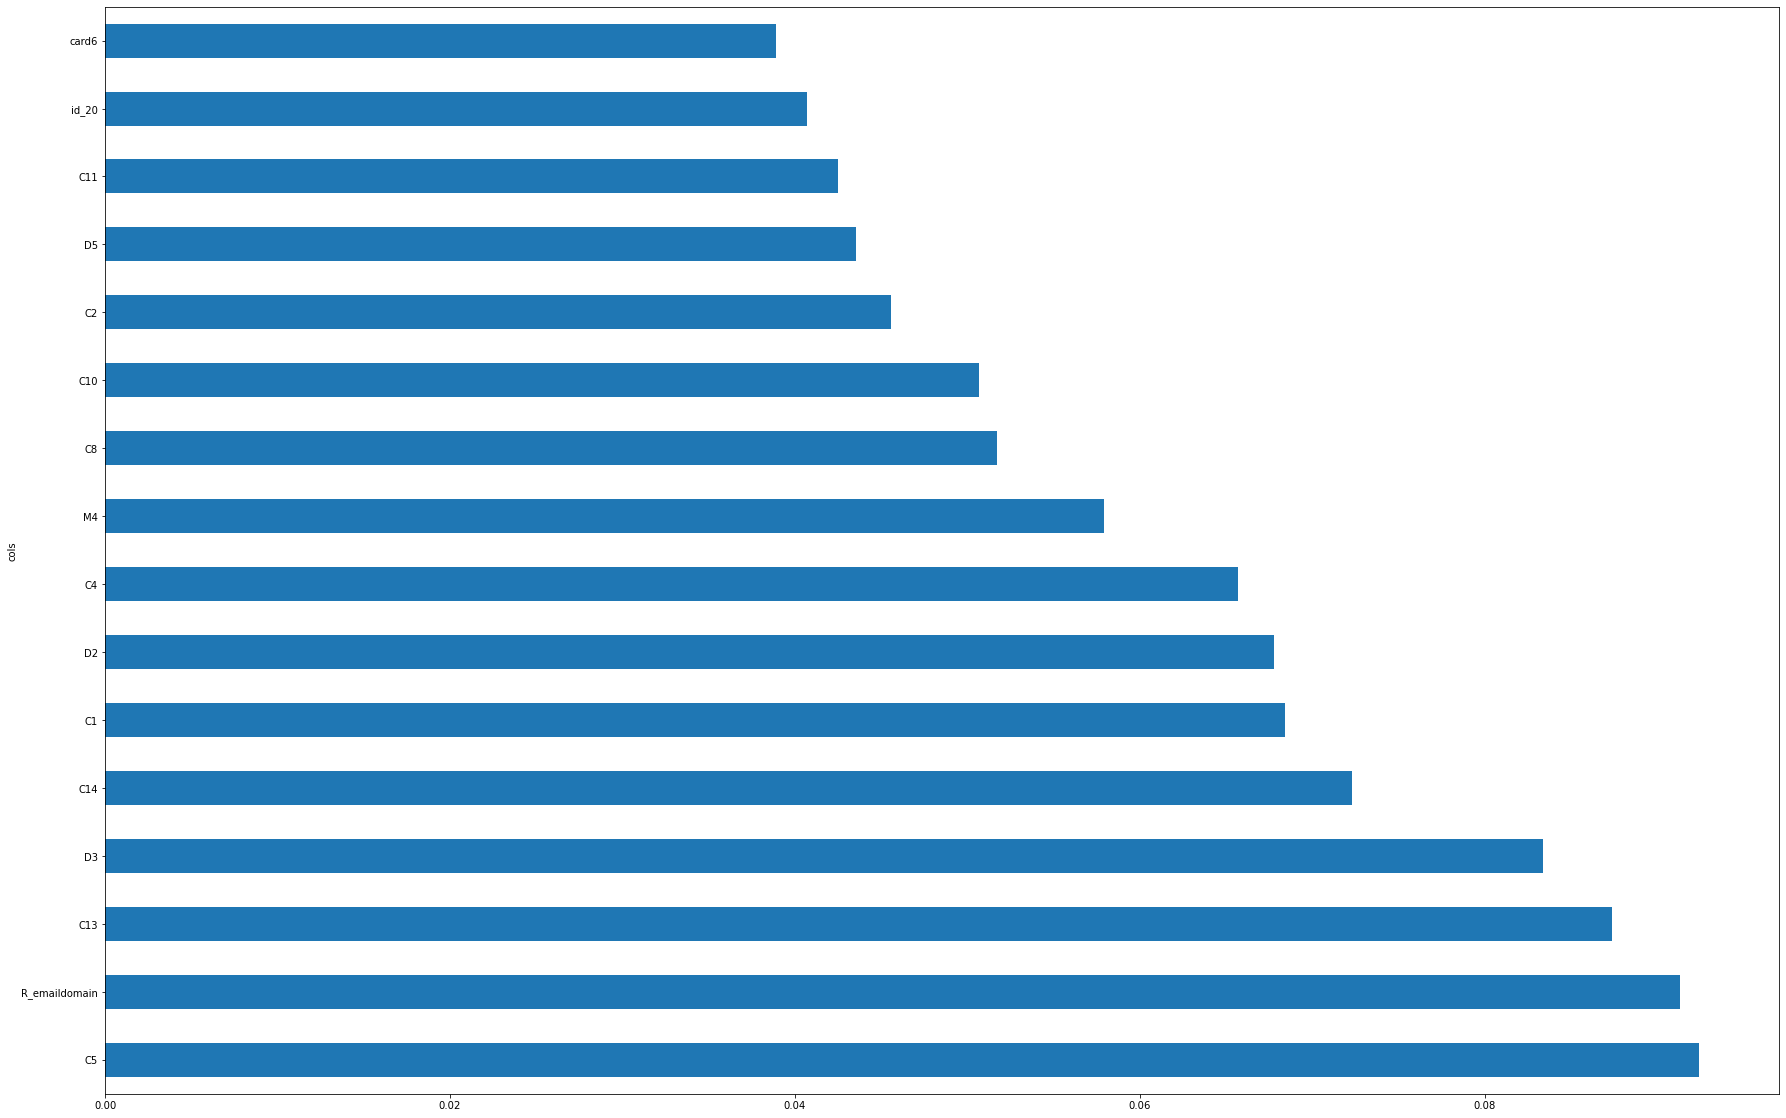

In [899]:
plot_fi(rf_feature_importance(m, xs_imp))

In [107]:
to_keep = fi[fi.imp>0.003].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 92


(0.8931459026263358, 0.8410743721516534)

<AxesSubplot:ylabel='cols'>

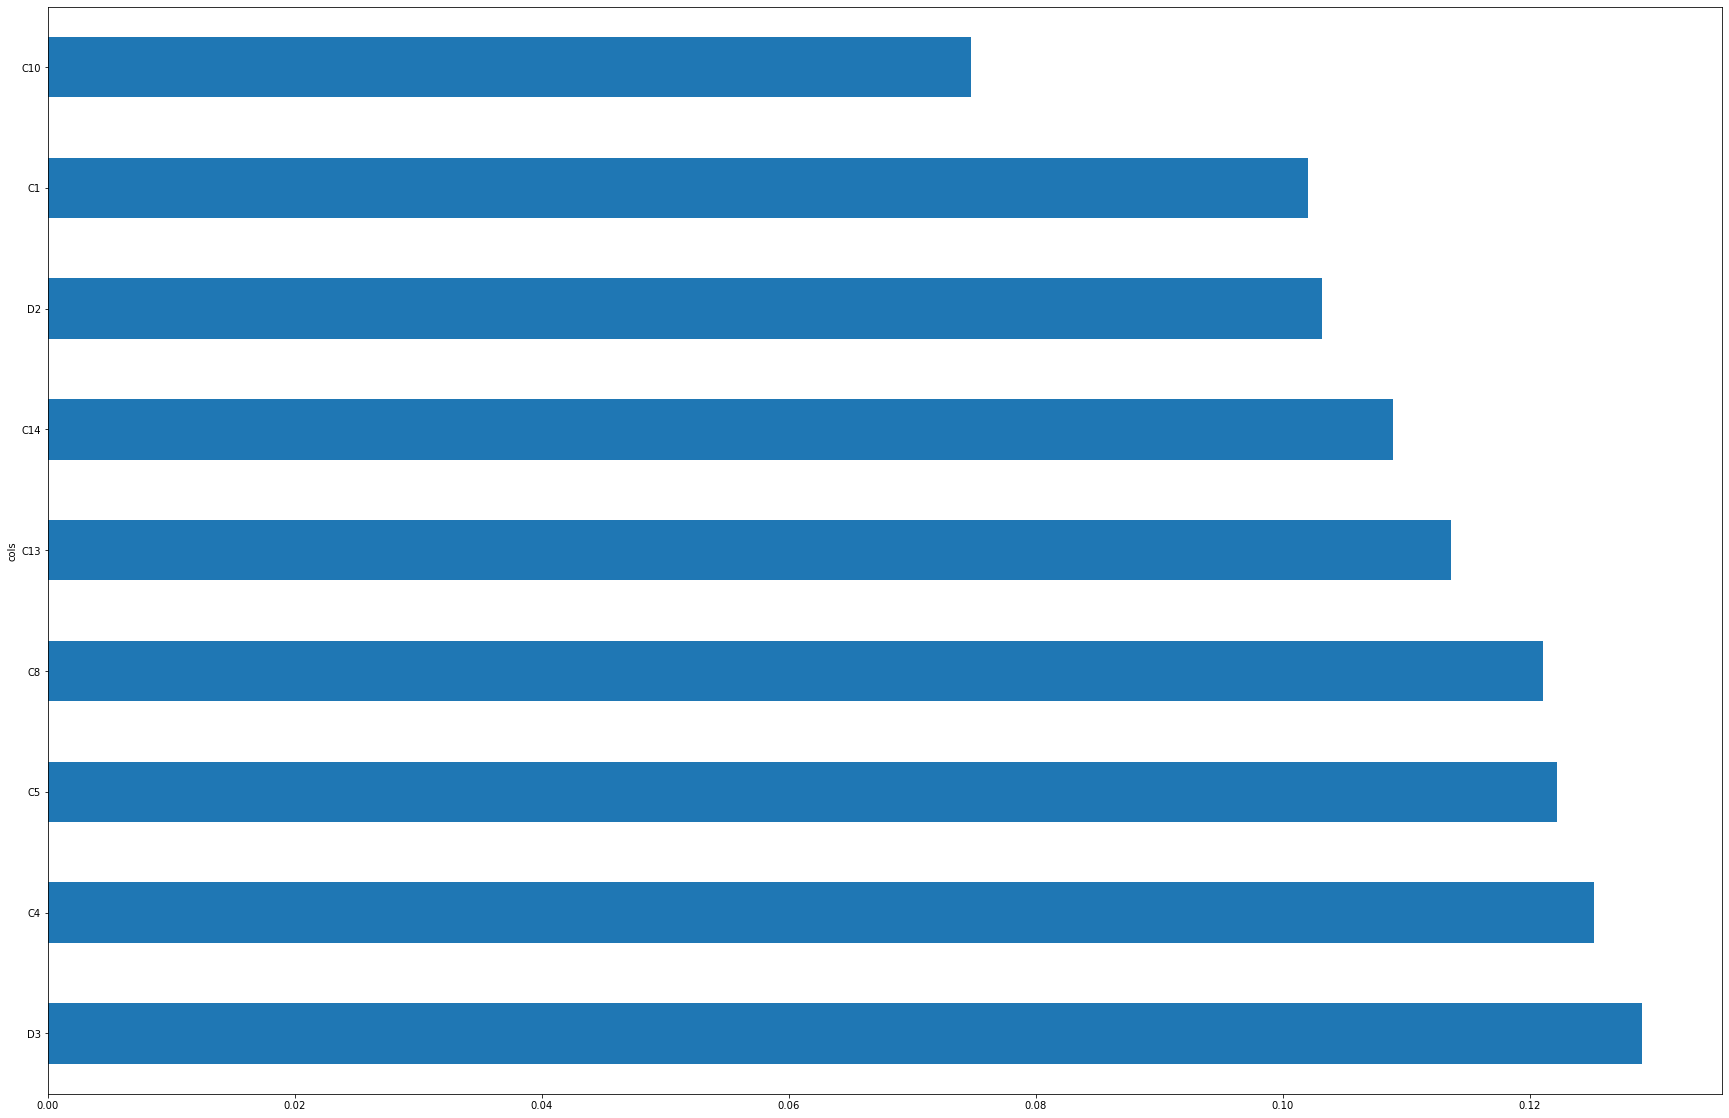

In [901]:
plot_fi(rf_feature_importance(m, xs_imp))

In [108]:
to_keep = fi[fi.imp>0.004].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 67


(0.8932521191043111, 0.8398661829635975)

<AxesSubplot:ylabel='cols'>

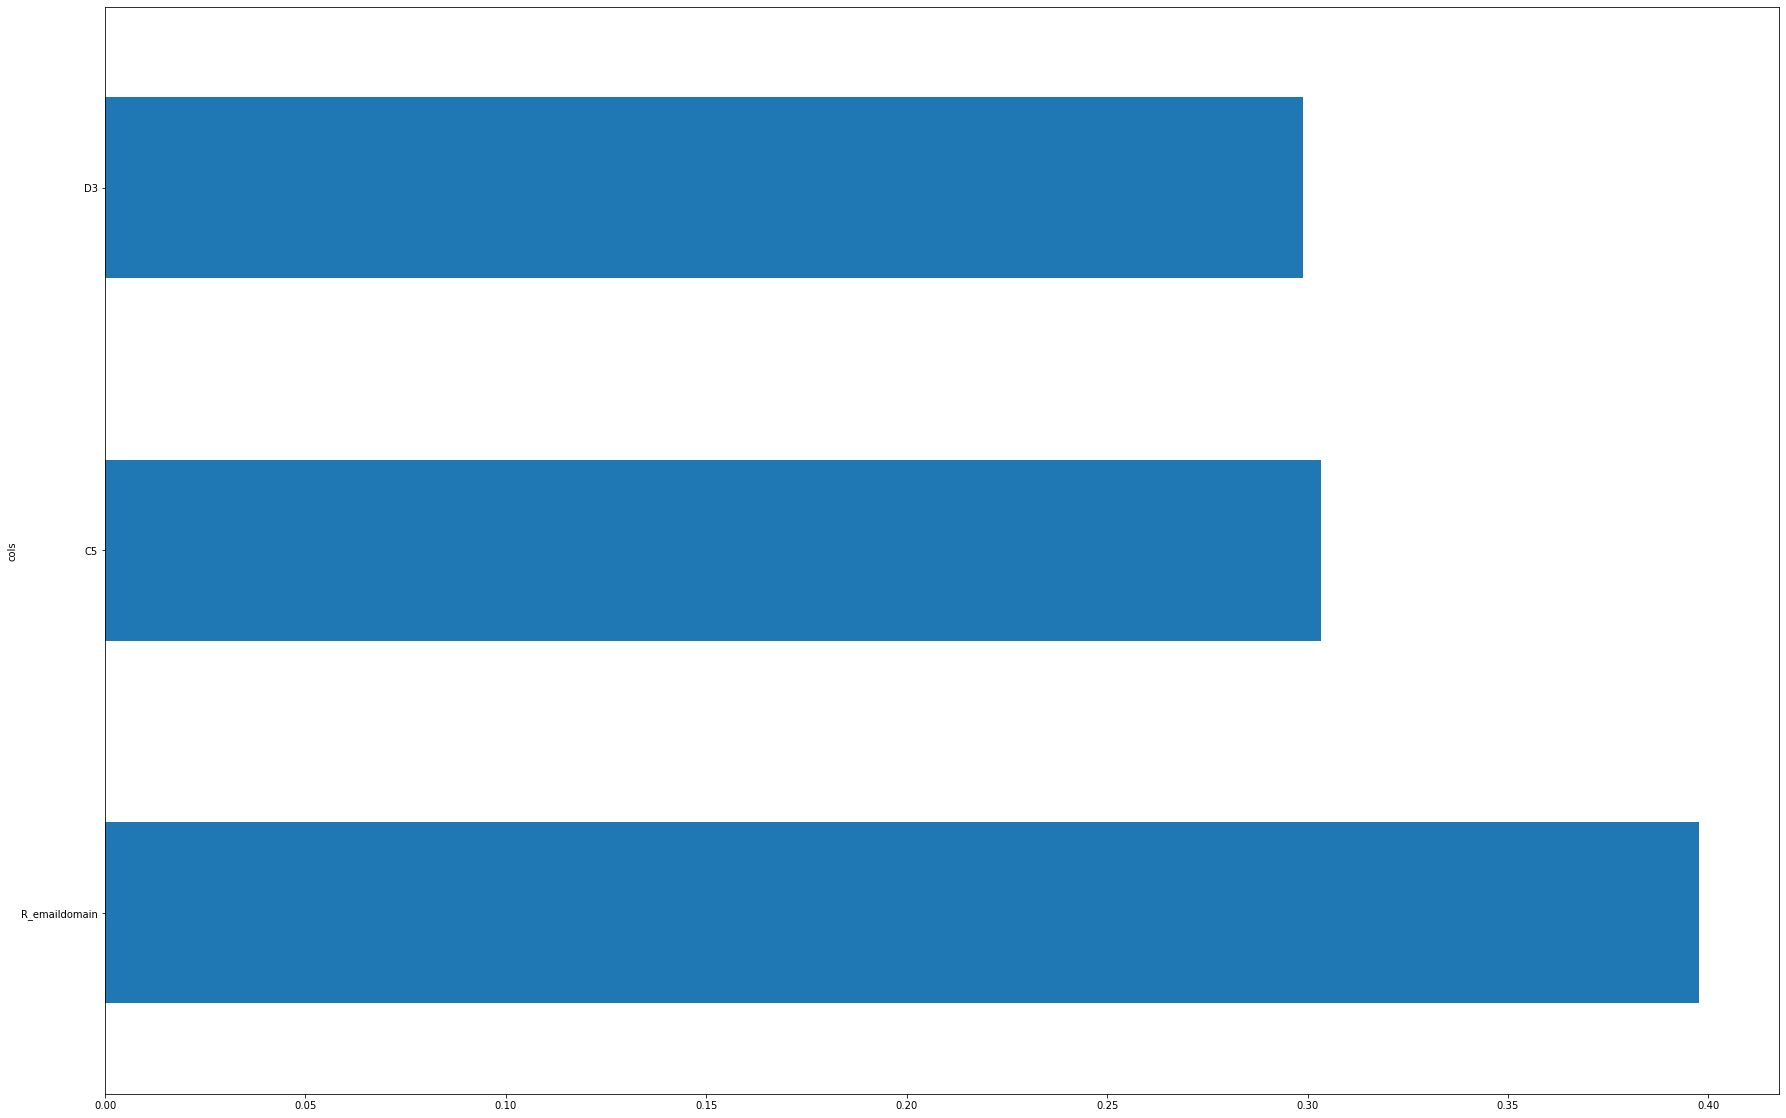

In [833]:
plot_fi(rf_feature_importance(m, xs_imp))

##  Remove redundant features

In [110]:
xs_imp.shape, valid_xs_imp.shape

((48378, 128), (10676, 128))

In [1060]:
#from scipy.cluster import hierarchy as hc

In [1061]:
# #def cluster_columns(df, figsize=(10,6), font_size=12):
#     corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
#     corr_condensed = hc.distance.squareform(1-corr)
#     z = hc.linkage(corr_condensed, method='average')
#     fig = plt.figure(figsize=figsize)
#     hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
#     plt.show()

In [112]:
cluster_columns?

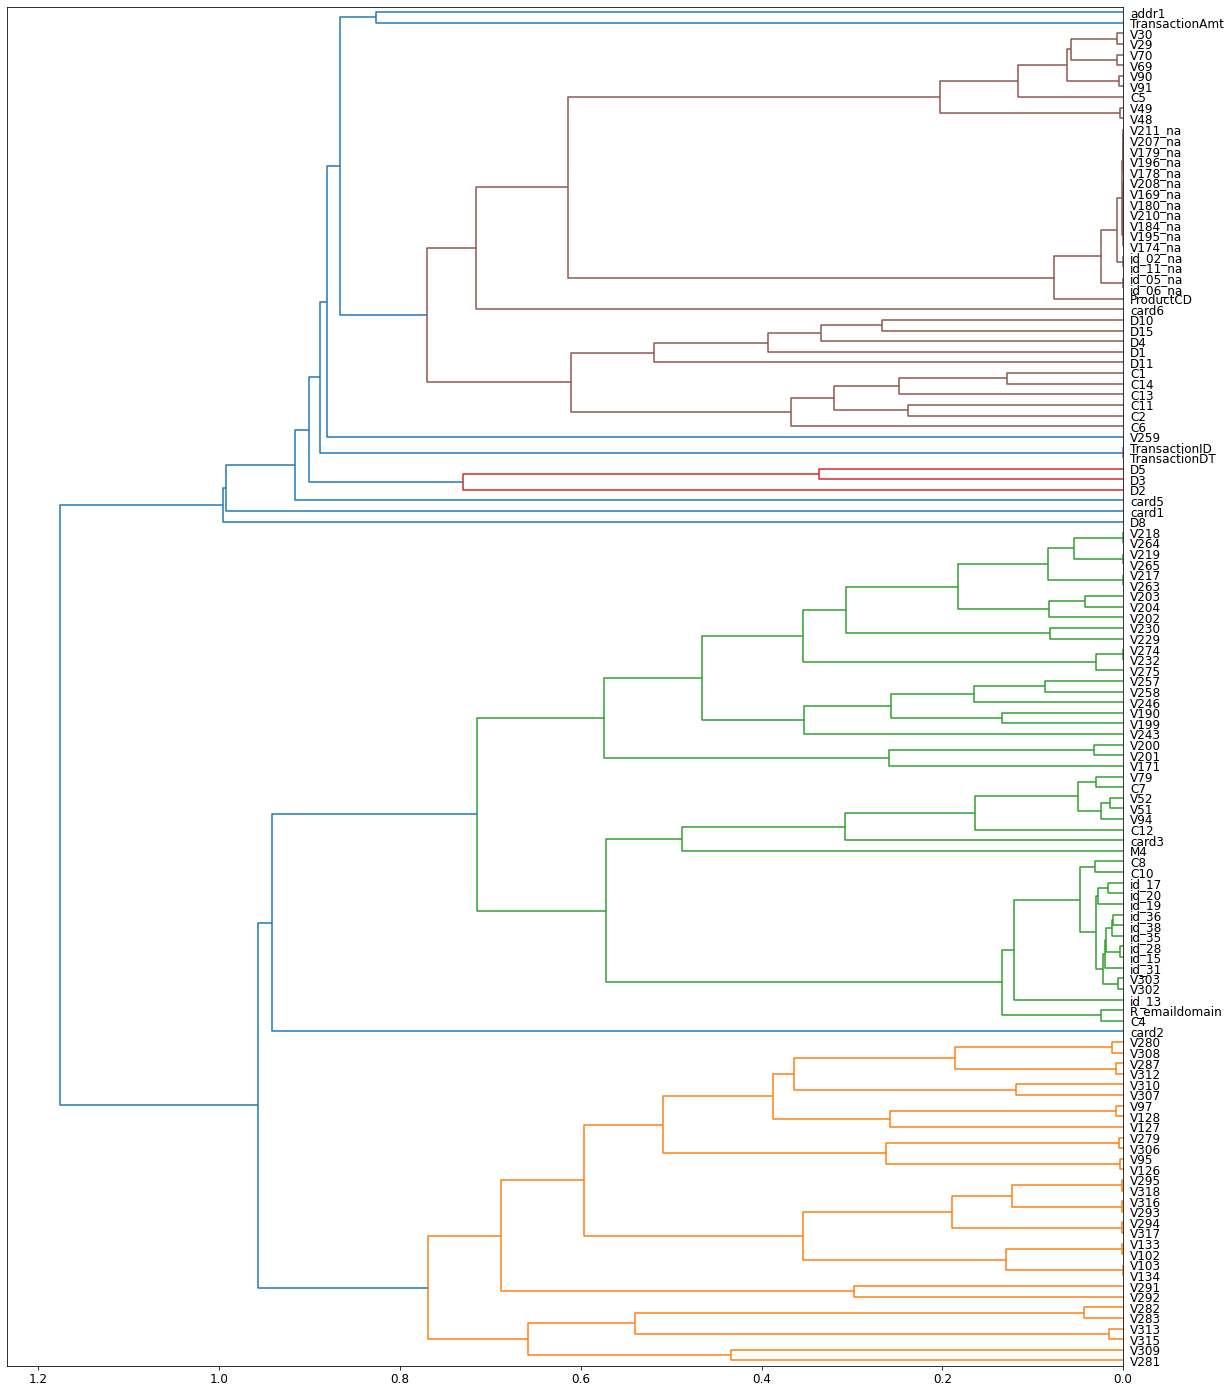

In [117]:
cluster_columns(xs_imp, figsize=(20,25))

This suggests that one of TransactionID or TransactionDT is redundant.
Other possible redundant groups: (id_17, id_20), (id_28, id_36, 'DeviceType').

In [164]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=40, class_weight='balanced', max_leaf_nodes=50,
        max_features='sqrt', n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [165]:
get_oob(xs_imp)

0.8638834050659946

In [167]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'TransactionID', 'TransactionDT', 'id_17', 'id_20', 'id_36', 'id_28', 'DeviceType')}

{'TransactionID': 0.8635046350372061,
 'TransactionDT': 0.8622365809574339,
 'id_17': 0.8640154756374246,
 'id_20': 0.8653938888978663,
 'id_36': 0.8630165823256749,
 'id_28': 0.8620913988831709,
 'DeviceType': 0.8627997829006069}

In [169]:
to_drop = ['TransactionID', 'id_17', 'id_28', 'id_36']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8632019334967157

In [174]:
xs_imp.shape, valid_xs_imp.shape

((48378, 33), (10676, 33))

In [171]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [172]:
(path/'xs_final.pkl').save(xs_final)
(path/'valid_xs_final.pkl').save(valid_xs_final)

In [1099]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [1100]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
m_roc(y, xs_final), m_roc(valid_y, valid_xs_final)

(0.8934810019162146, 0.8344006160883359)

## Partial dependance

In [176]:
valid_xs_final.columns

Index(['C5', 'D3', 'C14', 'C13', 'C4', 'D2', 'C1', 'C8', 'C2', 'R_emaildomain',
       'D5', 'M4', 'card6', 'C11', 'C10', 'TransactionDT', 'id_20',
       'ProductCD', 'M5', 'C12', 'TransactionAmt', 'D1', 'DeviceType', 'D8',
       'addr2', 'D15', 'id_31', 'C6', 'card2'],
      dtype='object')

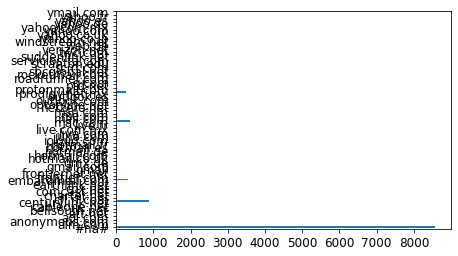

In [177]:
p = valid_xs_final['R_emaildomain'].value_counts(sort=False).plot.barh()
c = to.classes['R_emaildomain']
plt.yticks(range(len(c)), c);

In [1153]:
# I want to look at the Fraud column for all values in the training set where R_emaildomain is missing
n = 1000
pd.options.display.max_rows = n
train_ss[['isFraud','R_emaildomain']].head(n)

,isFraud,R_emaildomain
57195,0,NaN
312877,0,NaN
195195,1,NaN
21600,0,NaN
12253,0,NaN
377675,0,anonymous.com
160611,0,gmail.com
86738,0,hotmail.com
426550,0,NaN
34293,0,NaN


In [1154]:
pd.options.display.max_rows = 20


#na# stands out amoung the categories of "R_emaildomain". 

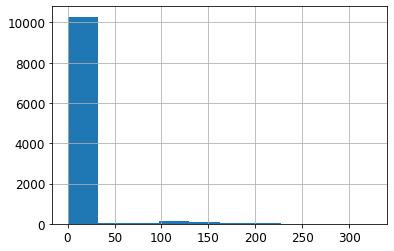

In [178]:
ax = valid_xs_final['C5'].hist()

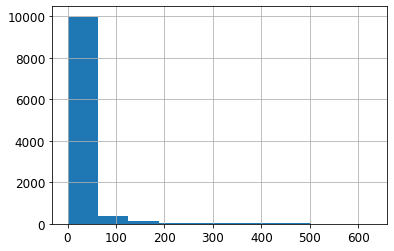

In [179]:
ax = valid_xs_final['D3'].hist()

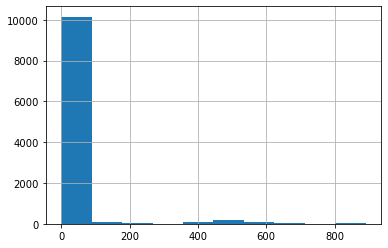

In [44]:
ax = valid_xs_final['C13'].hist()

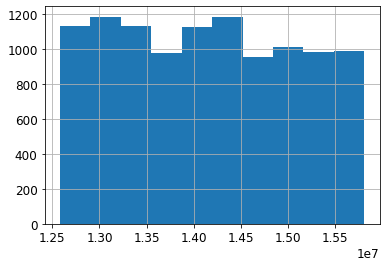

In [1156]:
ax = valid_xs_final['TransactionDT'].hist()

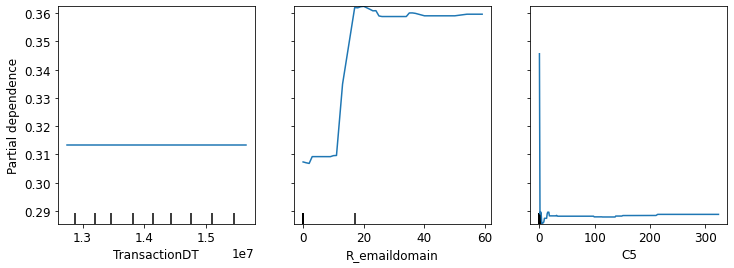

In [1206]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, valid_xs_final, ['TransactionDT','R_emaildomain', 'C5'],
                        grid_resolution=200, ax=ax)

In [1190]:
valid_xs_final['R_emaildomain'].unique()

array([ 0,  2, 55, 17, 20, 36, 54, 35,  5, 42, 31, 10, 24, 43, 22,  3, 32, 57, 25, 11, 27, 50, 18, 40, 58, 34,  4, 26, 46, 59, 56, 19, 49, 29, 37,  9, 41, 13, 23,  1, 33], dtype=int8)

## Tree Interperator

In [1223]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [1224]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [1238]:
row = valid_xs_final[:5]

In [1239]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [1284]:
prediction[0,1],bias[0,1] + contributions[0].sum(axis=0)[1]

(0.2945889951767163, 0.29458899517671605)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

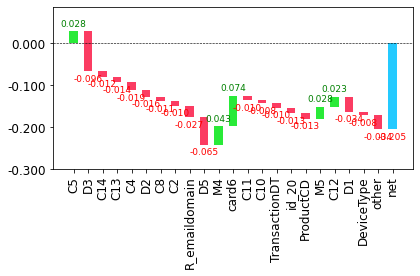

In [1303]:
waterfall(valid_xs_final.columns, contributions[0][:,1], threshold=0.08, 
          rotation_value=90, formatting='{:,.3f}')

## Finding Out-of-Domain Data

In [1313]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
15,TransactionDT,0.926421
25,D15,0.024386
26,id_31,0.012416
19,C12,0.005358
21,D1,0.005188
5,D2,0.005073


In [1320]:
m = rf(xs_final, y, n_estimators=200, class_weight='balanced')
print('orig', m_roc(valid_y, valid_xs_final))

for c in ('TransactionDT','D15','id_31','C12'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_roc(valid_y, valid_xs_final.drop(c,axis=1)))

orig 0.8353915021801097
TransactionDT 0.8265708930315826
D15 0.8192917067682368
id_31 0.8200035847665053
C12 0.8235271805170343


Can try droping columns that are older to see if keeping just more recent data makes a difference

<AxesSubplot:>

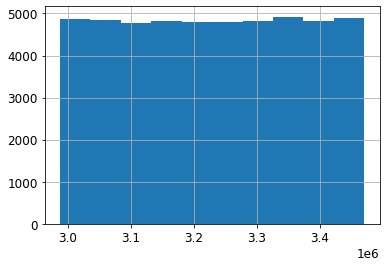

In [1324]:
xs['TransactionID'].hist()

In [118]:
filt = xs['TransactionID']>3.2e6
xs_filt = xs[filt]
y_filt = y[filt]

In [119]:
m = rf(xs, y, n_estimators=200, class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs)

(0.8915044206479522, 0.8410325676838374)